# Load & Inspect Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
data = pd.read_csv("conversion_data.csv")
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [3]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


# Data Cleaning

### 1. Age above 100 is not reasonable

In [3]:
data = data.loc[data.age < 100,:]

In [5]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316198.000000,316198.000000,316198.000000,316198.000000
mean,30.569311,0.685469,4.872918,0.032252
std,8.268958,0.464329,3.341053,0.176669
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,79.000000,1.000000,29.000000,1.000000


### 2. Check if there's null value

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316198 entries, 0 to 316199
Data columns (total 6 columns):
country                316198 non-null object
age                    316198 non-null int64
new_user               316198 non-null int64
source                 316198 non-null object
total_pages_visited    316198 non-null int64
converted              316198 non-null int64
dtypes: int64(4), object(2)
memory usage: 16.9+ MB


In [7]:
data.isnull().values.any()

False

# Exploratory Analysis

### 1. Inspect country conversion

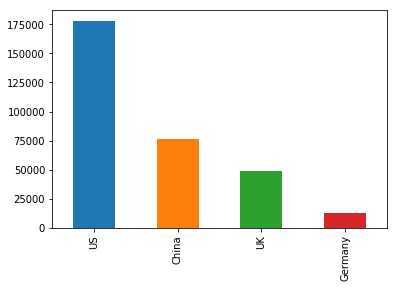

In [8]:
country = data.country.value_counts()
country.plot(kind='bar')

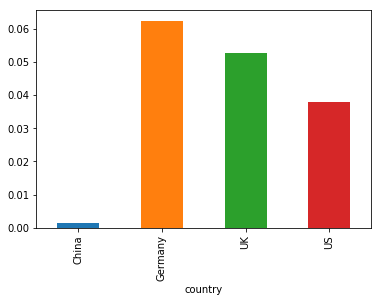

In [9]:
country_grouped = data.groupby("country")["converted"].mean()
country_grouped.plot(kind='bar')

### 2. Inspect age conversion

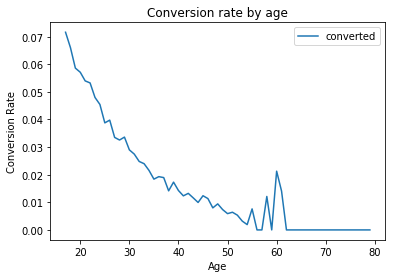

In [31]:
age_grouped = data[['age', 'converted']].groupby('age').mean()

age_grouped.plot()
plt.title('Conversion rate by age')
plt.ylabel('Conversion Rate')
plt.xlabel('Age')
plt.show()

summary: xxxx

### 3. Inspect the relationship between source & total age

In [67]:
age_grouped2 = data[['source','age']].groupby(['source','age']).size()
age_grouped2.head()

# Series to dataframe
age_grouped2 = age_grouped2.to_frame().reset_index()
age_grouped2.head()
age_grouped2.source.unique()

array(['Ads', 'Direct', 'Seo'], dtype=object)

In [94]:
# create source value as Y
ads = age_grouped2[age_grouped2.source == 'Ads']
direct = age_grouped2[age_grouped2.source == 'Direct']
seo = age_grouped2[age_grouped2.source == 'Seo']

ads.columns = ['source','age','amt']
direct.columns = ['source','age','amt']
seo.columns = ['source','age','amt']

In [69]:
# create age series as X
#age = pd.Series(range(17,80))
#len(age.values)
#len(ads.values)

54

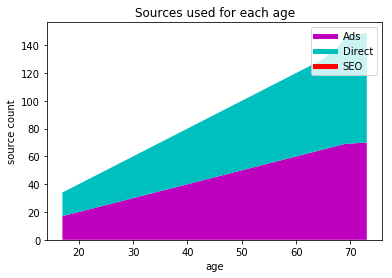

In [106]:
plt.plot([],[],color='m', label='Ads', linewidth=5)
plt.plot([],[],color='c', label='Direct', linewidth=5)
plt.plot([],[],color='r', label='SEO', linewidth=5)

plt.stackplot(seo.age.values,ads.age.values,direct.age.values, colors=['m','c','r'])

plt.xlabel('age')
plt.ylabel('source count')
plt.title('Sources used for each age')
plt.legend()
plt.show()

In [105]:
seo.amt.values.mean()

2871.0925925925926

summary: xxx

# Predictive Modeling

After exploratory analysis, now I start to build predictive models. The dependent variable is binary so some possible machine learning algorism:


- Logistic regression
- Decision Trees
- Naive Bayes
- KNN

## Data Preparation

In [117]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316198 entries, 0 to 316199
Data columns (total 6 columns):
country                316198 non-null object
age                    316198 non-null int64
new_user               316198 non-null int64
source                 316198 non-null object
total_pages_visited    316198 non-null int64
converted              316198 non-null int64
dtypes: int64(4), object(2)
memory usage: 16.9+ MB


In [116]:
data.new_user = data.new_user.astype('category')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316198 entries, 0 to 316199
Data columns (total 6 columns):
country                316198 non-null object
age                    316198 non-null int64
new_user               316198 non-null int64
source                 316198 non-null object
total_pages_visited    316198 non-null int64
converted              316198 non-null int64
dtypes: int64(4), object(2)
memory usage: 16.9+ MB


In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_curve, classification_report
from sklearn import linear_model
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import tree
from sklearn.naive_bayes import GaussianNB 

warnings.filterwarnings("ignore")

In [27]:
# create X independent variables
X = data.loc[:,('country', 'age', 'new_user', 'source', 'total_pages_visited')]
X = pd.get_dummies(X)
X.head()

,age,new_user,total_pages_visited,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,1,0,1,0,0
1,23,1,5,0,0,0,1,0,0,1
2,28,1,4,0,0,0,1,0,0,1
3,39,1,5,1,0,0,0,0,0,1
4,30,1,6,0,0,0,1,0,0,1


In [9]:
# create Y independent variables
Y = data.converted
Y.mean()

0.03225194340255157

The target variable is very imbalanced, so we should not use plain 'accurancy' as the metric to judge a classifier is good or not

In [10]:
# split training / testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.2,
                                                    random_state=100)

In [11]:
Y_train.mean(),Y_test.mean()

(0.03192229540081753, 0.03357052498418722)

## Feature Selection & Feature Engineering

In [28]:
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

# Step forward feature selection
def feature_selection(clf): 
# Build step forward feature selection
    sfs1 = sfs(clf,
               k_features='best',
               forward=True,
               floating=False,
               n_jobs=10,
               verbose=2,
               scoring='accuracy',
               cv=5)

    # Perform SFFS
    sfs1 = sfs1.fit(X, Y)
    list_features = sfs1.k_feature_idx_
    return list_features

In [34]:
# Selected Features
list_features = feature_selection(linear_model.LogisticRegression())
X_new = X.iloc[:,list(list_features)]

[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    6.5s remaining:   15.2s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    7.6s finished

[2019-02-10 11:06:47] Features: 1/10 -- score: 0.982956882576894[Parallel(n_jobs=9)]: Done   2 out of   9 | elapsed:    8.1s remaining:   28.2s
[Parallel(n_jobs=9)]: Done   7 out of   9 | elapsed:    8.6s remaining:    2.5s
[Parallel(n_jobs=9)]: Done   9 out of   9 | elapsed:    8.8s finished

[2019-02-10 11:06:56] Features: 2/10 -- score: 0.9844432929407019[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    7.5s remaining:   12.4s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    8.6s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    8.6s finished

[2019-02-10 11:07:05] Features: 3/10 -- score: 0.9852529117598399[Parallel(n_jobs=7)]: Done   2 out of   7 | elapsed:    7.7s remaining:   19.3s
[Parallel(n_jobs=7)]: Done   7 out of   7 | elapsed:    9.2s finished

[2019-02-10 11:07:14] Features: 4/10 -- 

In [35]:
X_new.head()

,age,new_user,total_pages_visited,country_China,country_UK,country_US,source_Direct
0,25,1,1,0,1,0,0
1,23,1,5,0,0,1,0
2,28,1,4,0,0,1,0
3,39,1,5,1,0,0,0
4,30,1,6,0,0,1,0


## Data Normalization on Turned Features

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
scaler.fit(X_new)
X_new = scaler.transform(X_new)

## Baseline Model - Logistic

In [38]:
# Number of random trials
NUM_TRIALS = 5
nested_scores = np.zeros(NUM_TRIALS)

# Parameters to optimize
p_grid = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Loop for each trial
for i in range(NUM_TRIALS):

    inner_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=i)
    
    logit_eqn = linear_model.LogisticRegression()
    clf = GridSearchCV(estimator=logit_eqn, param_grid = p_grid, cv=inner_cv)

    # Nested CV with parameter optimization
    nested_score = cross_val_score(clf, X=X_new, y=Y, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

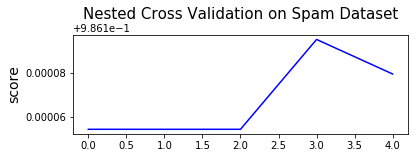


Mean Accuracy	:

0.986167527336686


In [39]:
# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)

nested_line, = plt.plot(nested_scores, color='b')
plt.ylabel("score", fontsize="14")

plt.title("Nested Cross Validation on Dataset", x=.5, y=1.1, fontsize="15")

plt.show()

print('\nMean Accuracy\t:\n')
print(nested_scores.mean())

## 2. Decision Trees

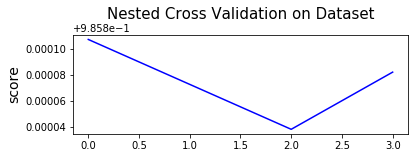


Mean Accuracy	:

0.9858751478348297
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Average scores of 0.985875 with std. dev. of 0.000025.


In [45]:
NUM_TRIALS = 4;
nested_scores= np.zeros(NUM_TRIALS)

tuned_parameters = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 30],
              "max_depth": [5, 10, 20],
              "min_samples_leaf": [1, 5, 15, 40],
              "max_leaf_nodes": [5, 10, 30, 50],
              }

for i in range(NUM_TRIALS):
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    clf2 = GridSearchCV(estimator= tree.DecisionTreeClassifier(), param_grid=tuned_parameters, cv=inner_cv)
    predictions = clf2.fit(X_new,Y)


# Nested CV with parameter optimization
    nested_score = cross_val_score(clf2, X_new,Y, cv=outer_cv)
    nested_scores[i] = nested_score.mean()
    
plt.figure()
plt.subplot(211)

nested_line, = plt.plot(nested_scores, color='b')
plt.ylabel("score", fontsize="14")

plt.title("Nested Cross Validation on Dataset", x=.5, y=1.1, fontsize="15")

plt.show()

print('\nMean Accuracy\t:\n')
print(nested_scores.mean())
print(clf2.estimator)
print("Average scores of {0:6f} with std. dev. of {1:6f}.".format(nested_scores.mean(), nested_scores.std()))

## 3. Naive Bayes 

0.9761415315355512

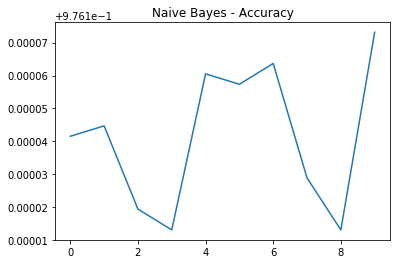

In [48]:
nb_pipeline = GaussianNB()
set_seeds = [1, 5, 10, 25, 50, 100, 250, 500, 750, 1000]

# Arrays to store scores
nb_nested_scores = []

# Loop for each trial
for i in set_seeds:
    outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)

    # Nested CV with parameter optimization
    nb_nested_score = cross_val_score(nb_pipeline, X=np.asarray(X_new), y=np.asarray(Y), cv=outer_cv)
    nb_nested_scores.append(nb_nested_score.mean())
    
plt.plot(nb_nested_scores)
plt.title("Naive Bayes - Accuracy")
sum(nb_nested_scores) / len(nb_nested_scores)